In [40]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [41]:
MNIST = tf.keras.datasets.mnist

In [42]:
(x_train, y_train),(x_test, y_test) = MNIST.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


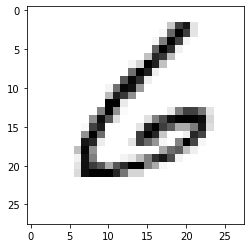

In [43]:
plt.imshow(x_train[-2], cmap=plt.cm.binary)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.10507478 0.37248424 0.44503664 0.06041448 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

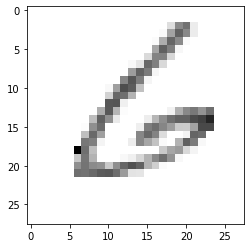

In [44]:

            
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train[-2])
plt.imshow(x_train[-2], cmap=plt.cm.binary)

In [45]:
SIZE = 28
x_trainr = np.array(x_train).reshape(-1, SIZE, SIZE, 1)
x_testr = np.array(x_test).reshape(-1, SIZE, SIZE, 1)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D

In [53]:
model = Sequential()

model.add(Convolution2D(
    input_shape=x_trainr.shape[1:],
    kernel_size=5,
    filters=8,
    strides=1,
    activation='relu',
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation='relu',
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(Flatten())

model.add(Dense(
    units=128,
    activation='relu'
));

model.add(Dropout(0.2))

model.add(Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [54]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 12, 12, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)             

In [55]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
model.fit(x_trainr,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2534 - accuracy: 0.9210
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0927 - accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0680 - accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0528 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0465 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0389 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0343 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0306 - accuracy: 0.9901
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0262 - accuracy: 0.9916
Epoch 10/10
1875/1875 [==============================] - 23s 12ms/s

In [57]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print(test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0364 - accuracy: 0.9882
0.9882000088691711


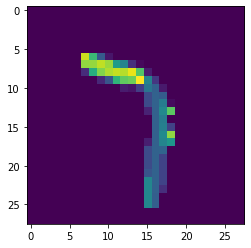

In [58]:
plt.imshow(x_test[122])

In [59]:
predictions = model.predict([x_testr])

313/313 [==============================] - 1s 3ms/step


In [60]:
print(np.argmax(predictions[122]))

7


In [62]:
import cv2
model.save('digitrec2.h5')